[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


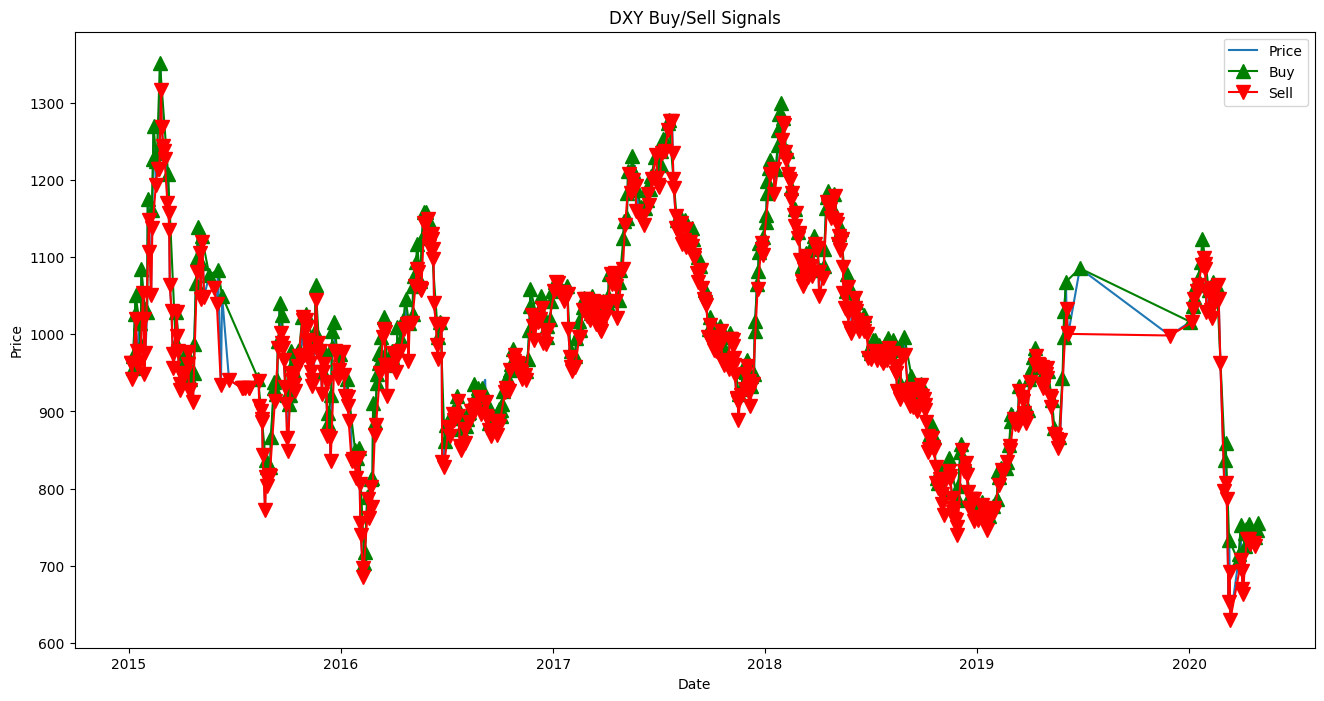

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#set the stock symbol , strat date ,end date
stock_symbol="DXY"
start_date="2015-01-01"
end_date="2021-01-01"

#download the stock data from yfinance
df=yf.download(stock_symbol,start=start_date,end=end_date)

#calculate the percentage return of the closing price
df['pct_return']=df['Adj Close'].pct_change()

#remove the row contain nan values
df.dropna(inplace=True)

#perform kmeans clustering with k=9
x=np.array(df['pct_return']).reshape(-1,1)
kmeans=KMeans(n_clusters=9,random_state=42).fit(x)



#define a function to calculate the cluster bounderies using the samples closests to the cluster center
def calculate_cluster_boundaries(cluster_indices,cluster_center):
  cluster_distance=np.abs(x[cluster_indices]-cluster_center)
  min_distance=np.min(cluster_distance)
  max_distance=np.max(cluster_distance)
  return min_distance,max_distance

#add the cluster labels to the data frame
df['cluster']=kmeans.labels_

#calculate the boundaries for each cluster
cluster_boundaries={}

for i in range(9):
  cluster_indices=np.where(kmeans.labels_==i)[0]
  cluster_center=kmeans.cluster_centers_[i]
  min_distance,max_distance=calculate_cluster_boundaries(cluster_indices,cluster_center)
  cluster_boundaries[i]=[min_distance,max_distance]

df['boundaries']=df['cluster'].map(cluster_boundaries)

#calculate the signals
df['signals']=np.where(df['pct_return']<df['boundaries'].apply(lambda x:x[0]),-1 ,np.where(df['pct_return']>df['boundaries'].apply(lambda x:x[1]) ,1,0))


# Plot the signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Price')
plt.plot(df[df['signals'] == 1]['Adj Close'], marker='^', markersize=10, color='g', label='Buy')
plt.plot(df[df['signals'] == -1]['Adj Close'], marker='v', markersize=10, color='r', label='Sell')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Buy/Sell Signals')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
             Returns
Date                
2015-01-05 -1.275582
2015-01-06  0.097283
2015-01-07 -0.110672
2015-01-08 -0.110740
2015-01-09 -0.606797
...              ...
2021-08-25  0.044355
2021-08-26 -0.471982
2021-08-27  0.375906
2021-08-30  0.701914
2021-08-31  0.123661

[1677 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


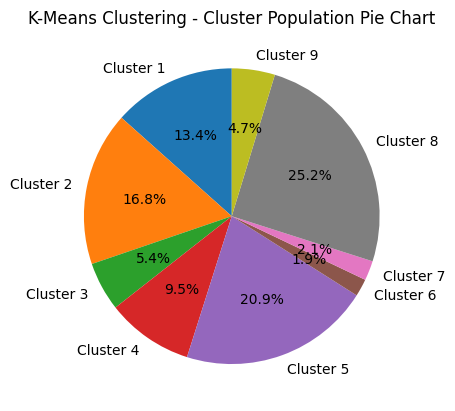

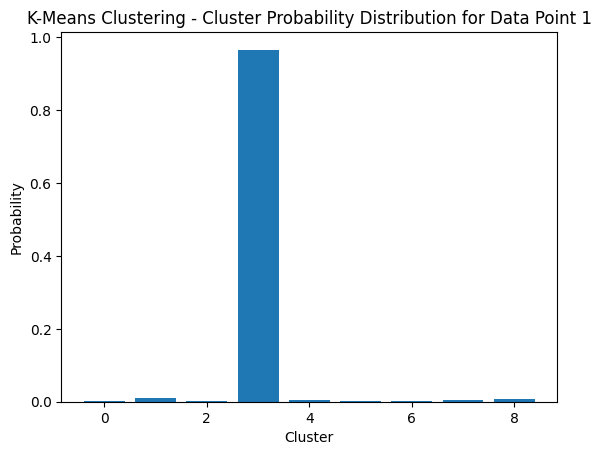

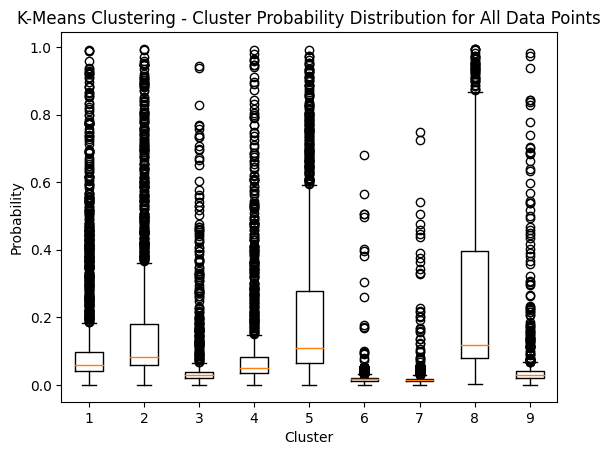

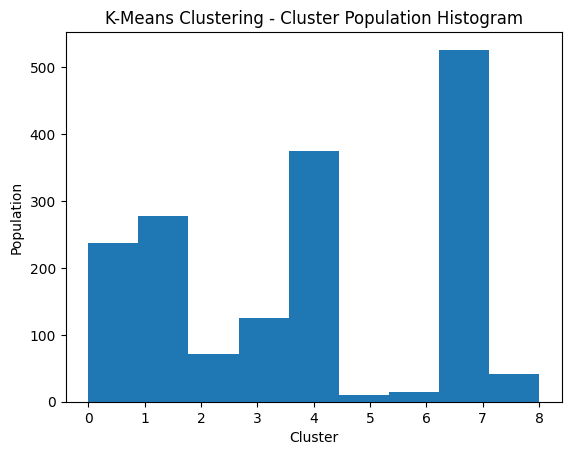

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


# Number of clusters

n_clusters = 9

# Define the stock specifications
stock_symbol = "TSLA"
start_date = "2015-01-01"
end_date = "2021-09-01"

# Download the stock data from Yahoo Finance
df= yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data
print(X)

# Define and initialize kmeans object
kmeans = KMeans(n_clusters=n_clusters)

# Run K-Means algorithm on data
kmeans.fit(X)

# Calculate estimated cluster probability for each candle
dists = kmeans.transform(X)
probs_i = np.zeros((len(X), n_clusters))

for j in range(len(X)):

    probs_i_j = [1 / d for d in dists[j]]

    prob_i_j = probs_i_j / sum(probs_i_j)

    probs_i[j] = prob_i_j


# Pie chart of cluster population
cluster_populations = np.zeros(n_clusters)

for i in range(n_clusters):

    cluster_populations[i] = np.sum(probs_i[:, i])

plt.pie(cluster_populations, labels=['Cluster {}'.format(i+1) for i in range(n_clusters)], startangle=90, autopct='%1.1f%%')

plt.title('K-Means Clustering - Cluster Population Pie Chart')
plt.show()

# Distribution plot of cluster probabilities for a single data point
idx = 0

plt.bar(range(n_clusters), probs_i[idx])

plt.title('K-Means Clustering - Cluster Probability Distribution for Data Point {}'.format(idx+1))
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()

# Distribution plot of cluster probabilities for all data points
plt.boxplot(probs_i)

plt.title('K-Means Clustering - Cluster Probability Distribution for All Data Points')
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()


# Histogram of cluster population
plt.hist(kmeans.labels_, bins=n_clusters)
plt.title('K-Means Clustering - Cluster Population Histogram')
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.show()